In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
import keras
from keras import layers

gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.OneHot_gen import *
from Utils.TFIDF_gen import *
from Utils.word2vec_gen import *
from Utils.vector_gen import *
from Utils.metrics_summary import *

from Models.RNN_paper_prototype import *


2024-03-16 17:07:14.279476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 17:07:14.279508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 17:07:14.280538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 17:07:14.286181: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 17:07:14.959240: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-16 17:07:15.619213: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 17:07:15.655276: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 17:07:15.655464: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)
vectors = vec_split(original_df)
word2vec_init(original_df, vectors, gpu_token)
tensors = tensor_gen(vectors)

2024-03-15 00:59:55.472839: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-15 00:59:55.473059: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-15 00:59:55.473218: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
!git pull

Already up to date.


In [3]:
model = model_ver_2(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 218, 256)          66048     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 218, 256)          131328    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 2)                 5

In [4]:
history = model.fit(tensors[0], tensors[2], epochs=20)
y_pred = model.predict(tensors[1])

Epoch 1/20
131/131 [==============================] - 133s 1s/step - loss: 0.0115 - accuracy: 0.9762
Epoch 2/20
131/131 [==============================] - 132s 1s/step - loss: 0.0110 - accuracy: 0.9810
Epoch 3/20
131/131 [==============================] - 132s 1s/step - loss: 0.0097 - accuracy: 0.9813
Epoch 4/20
131/131 [==============================] - 131s 1s/step - loss: 0.0097 - accuracy: 0.9813
Epoch 5/20
131/131 [==============================] - 131s 1s/step - loss: 0.0096 - accuracy: 0.9813
Epoch 6/20
131/131 [==============================] - 132s 1s/step - loss: 0.0095 - accuracy: 0.9813
Epoch 7/20
131/131 [==============================] - 131s 1s/step - loss: 0.0096 - accuracy: 0.9813
Epoch 8/20
131/131 [==============================] - 132s 1s/step - loss: 0.0094 - accuracy: 0.9813
Epoch 9/20
131/131 [==============================] - 132s 1s/step - loss: 0.0096 - accuracy: 0.9813
Epoch 10/20
131/131 [==============================] - 131s 1s/step - loss: 0.0096 - accura

In [5]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [6]:
score_summary(classified_labels, classified_outputs, 0)
score_summary(classified_labels, classified_outputs, 1)


For secure:
f1 score:  0.9903100775193798
precision score:  0.980806142034549
recall score:  0

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0



In [7]:
!git pull

Already up to date.


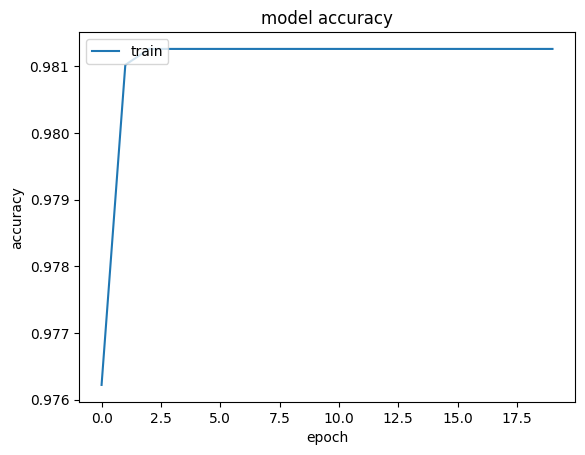

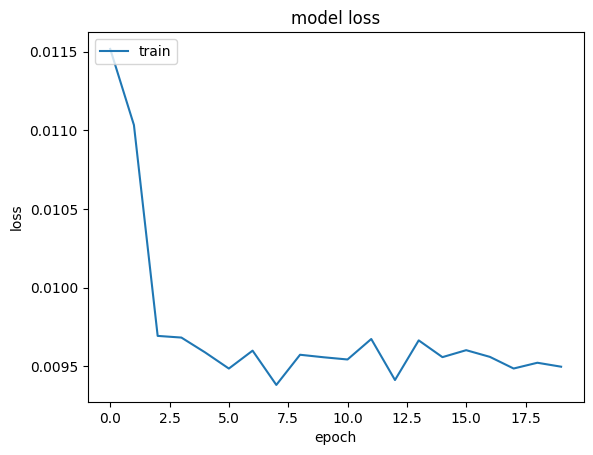

In [8]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
for i in vectors[1].Label:
    if i == [0,1]:
        print(i)

[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]


In [10]:
!nvidia-smi

Fri Mar 15 01:44:16 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 34%   52C    P2    30W / 151W |   7694MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------